# Ekstraksi Kata Kunci pada dokumen


In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
987,01-11-2023,Segini Besaran Uang Makan dan Uang Lauk Pauk P...,JAKARTA - Segini besaran uang makan dan uang l...,Politik
988,01-11-2023,Aturan RPP Kesehatan Bakal Picu Peredaran Roko...,JAKARTA – Aturan Rancangan Peraturan Pemerinta...,Politik
989,01-11-2023,Mentan: Cukup Pakai KTP Petani Dapat Pupuk Sub...,JAKARTA - Menteri Pertanian Amran Sulaiman men...,Politik
990,01-11-2023,Ganjar Ingin Masyarakat Rasakan Dampak Langsun...,JAKARTA - Calon Presiden Partai Perindo Ganjar...,Politik


## Pre Processing

In [3]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Ambil satu data

In [4]:
sampel = data.head(1)
sampel

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport


## Stopword

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Download stopwords dataset
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Hapus simbol dan angka menggunakan regular expression
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Gabungkan kembali kata-kata yang sudah diolah
    processed_text = ' '.join(words)

    return processed_text

def build_co_occurrence_matrix(corpus, window_size):
    # Build unique words
    unique_words = set()
    for text in corpus:
        text = preprocess_text(text)
        for word in word_tokenize(text):
            unique_words.add(word)

    word_search_dict = {word: np.zeros(shape=(len(unique_words))) for word in unique_words}
    word_list = list(word_search_dict.keys())
    for text in corpus:
        text = preprocess_text(text)
        text_list = word_tokenize(text)
        for idx, word in enumerate(text_list):
            # Pick word in the size range
            i = max(0, idx - window_size)
            j = min(len(text_list) - 1, idx + window_size)
            search = [text_list[idx_] for idx_ in range(i, j + 1)]
            search.remove(word)
            for neighbor in search:
                # Get neighbor idx in word_search_dict
                nei_idx = word_list.index(neighbor)
                word_search_dict[word][nei_idx] += 1
    return word_search_dict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
coo_dict=build_co_occurrence_matrix(sampel['Content'], window_size=1)

coo_dict

{'puas': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 'dinilai': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.,

In [7]:
coo_df = pd.DataFrame(coo_dict,index=coo_dict.keys()).astype('int')
coo_df

,puas,dinilai,klik,hujan,mengasapi,Musim,keselamatan,berbahaya,Mandalika,ketiga,...,apapun,angka,enam,diguyur,terpaksa,dihiasi,pembalap,perbedaan,kondisi,dihentikan
puas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dinilai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
klik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hujan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
mengasapi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dihiasi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pembalap,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perbedaan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kondisi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
coo_df.to_excel('matrix-coo-df.xlsx', index_label='Nama_Index')


## Graph

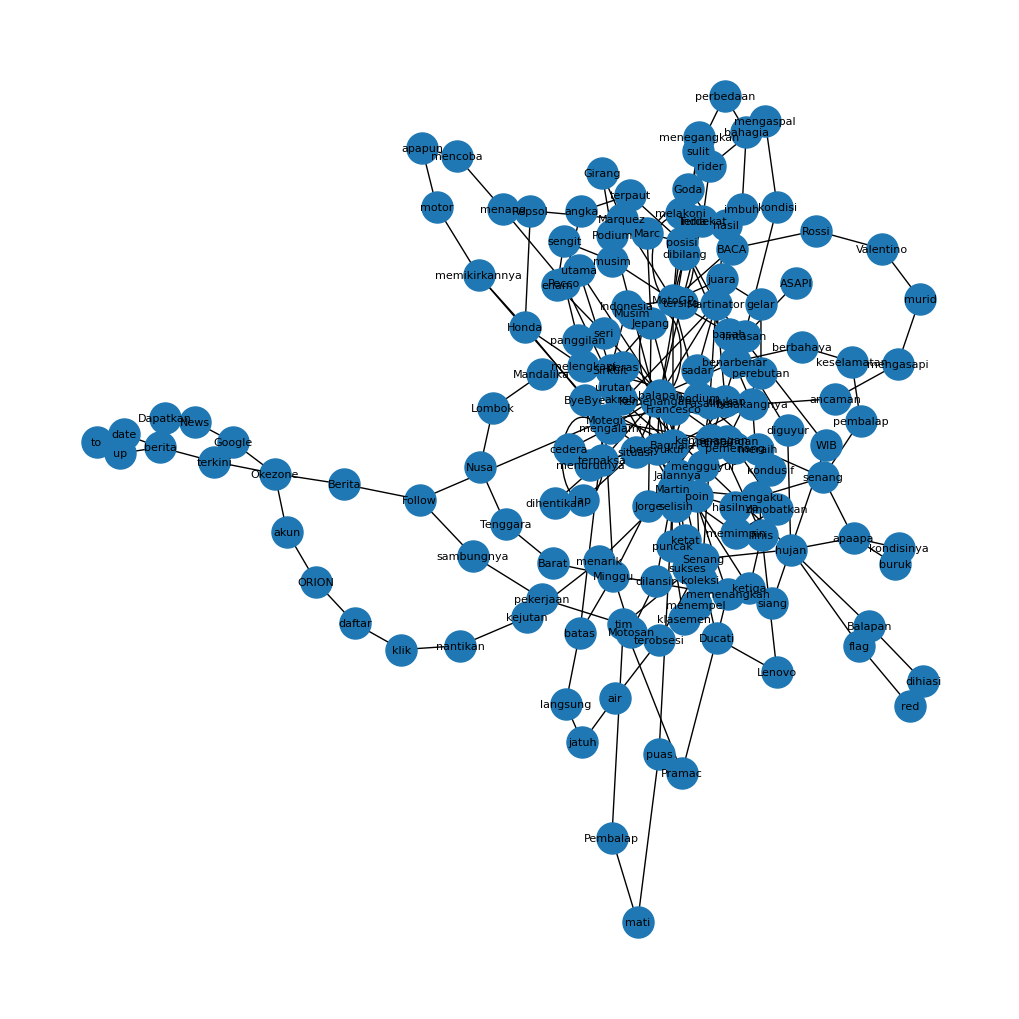

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the DataFrame to a networkx graph
G = nx.from_pandas_adjacency(coo_df)

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black')
plt.show()

## Page Rank

PageRank centrality adalah suatu metode untuk mengukur pentingnya simpul (node) dalam suatu jaringan berbasis graf. Metode ini awalnya dikembangkan oleh Larry Page dan Sergey Brin untuk menilai relevansi halaman web dalam mesin pencari Google, dan kemudian diadopsi dalam analisis jaringan umumnya. PageRank centrality mengukur seberapa penting atau otoritatif suatu simpul dengan memperhitungkan jumlah dan kualitas koneksi yang dimilikinya. Intinya, simpul-simpul yang dihubungkan dengan simpul lain yang juga memiliki keterhubungan yang tinggi akan mendapatkan skor PageRank yang lebih tinggi.



Rumus umum untuk menghitung nilai PageRank  dalam sebuah graf adalah:

$PR(A) = (1-d)  . \frac{1}{N}  + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$



- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85


Hitung manualnya:

https://docs.google.com/spreadsheets/d/1VwTRbX8RHhjUbQojaMSVYhkoLBj7wwfL/edit?usp=sharing&ouid=115908239064383970779&rtpof=true&sd=true

In [9]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node puas: PageRank = 0.002520798472398076
Node dinilai: PageRank = 0.004226349651063517
Node klik: PageRank = 0.006079254588648397
Node hujan: PageRank = 0.011982621964083723
Node mengasapi: PageRank = 0.0054841593865044905
Node Musim: PageRank = 0.00536990916660098
Node keselamatan: PageRank = 0.005911837156371993
Node berbahaya: PageRank = 0.005925997592936598
Node Mandalika: PageRank = 0.0055905234041724
Node ketiga: PageRank = 0.0027209849987924807
Node air: PageRank = 0.0059418410365247205
Node memimpin: PageRank = 0.004020961705060319
Node mengaku: PageRank = 0.003929448144558725
Node Marc: PageRank = 0.008374114425194744
Node murid: PageRank = 0.005514390758744827
Node melakoni: PageRank = 0.005399315679520974
Node Honda: PageRank = 0.006908482789123467
Node julukan: PageRank = 0.001973628280445496
Node terkini: PageRank = 0.005351159803228095
Node flag: PageRank = 0.00413924366636106
Node Jepang: PageRank = 0.011034891192313465
Node bahagia: PageRank = 0.005741539172927553
Nod

In [10]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('Martin', 0.03178600924171183),
 ('MotoGP', 0.030898031311098553),
 ('balapan', 0.028878469326662527)]